Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

Here is the data file. And here is the codebook, with information about the variable coding and content.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv

https://thinkful-ed.github.io/data-201-resources/ESS_practice_data/ESS_codebook.html

http://www.europeansocialsurvey.org/data/round-index.html


<table border="1">
<tr>
<th>Experiment Type</th>
<th colspan="2">Normally Distributed</th>
<th colspan="2">Non-Normally Distributed</th>
</tr>
<tr>
<th></th>
<th>Test</th>
<th>Function</th>
<th>Test</th>
<th>Function</th>
</tr>
<tr>
<td>A/B test, two independent groups</td>
<td>t-test for independent samples</td>
<td>[`scipy.stats.ttest_ind`] (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind)</td>
<td>Mann-Whitney U test<br>
Moon's Median Test<br>
Kruskal-Wallis Test</td>
<td>[`scipy.stats.mannwhitneyu`] (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu)<br>
[`scipy.stats.median_test`] (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html#scipy.stats.median_test)<br>
[`scipy.stats.kruskal`] (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal)</td>
</tr>
<tr>
<td>A/B/C/… test, three or more independent groups</td>
<td>One-way ANOVA</td>
<td>[`scipy.stats.f_oneway`] (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html#scipy.stats.f_oneway)</td>
<td>Mood’s median test<br>
Kruskal-Wallis test</td>
<td>[`scipy.stats.median_test`] (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.median_test.html#scipy.stats.median_test)<br>
[`scipy.stats.kruskal`] (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html#scipy.stats.kruskal)</td>
</tr>
<tr>
<td>A/B test where all participants experience both versions</td>
<td>t-test for paired samples</td>
<td> [`scipy.stats.ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel) </td>
<td>Wilcoxon signed-rank test</td>
<td>[`scipy.stats.wilcoxon`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon)</td>
</tr>
</table>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
#Tukey's Honest Significant Difference (HSD)
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB
None
               idno         year        tvtot      ppltrst      pplfair  \
count  8.594000e+03  8594.000000  8586.000000  8580.000000  8555.000000   
mean   3.954938e+04     6.500000     3.861985     5.559907     6.005143   
std    6.267259e+05     0.500029     2.019689     2.233700     2.129866   
min    1.000000e+00     6.000000     0.000000     0.000000     0.000000   
25%    1.052000e+03   

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

3. Who reported watching more TV in 2012, men or women?

4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [34]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


**Note**: Year 6 = 2012 and Year 7 = 2014

### Data Cleaning

In [3]:
#Fix nulls and data types
df.isnull().sum()

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64

In [4]:
df =df.fillna(df.median())


**Did people become less trusting from 2012 to 2014?**

In [5]:
#how many countries are there?
df['cntry'].value_counts()



ES    2426
SE    1816
CH    1546
NO    1462
CZ    1316
DE      28
Name: cntry, dtype: int64

In [6]:
#use set to get unique values

#dfc = set(df['cntry'])
dfc =  df.cntry.unique().tolist()
print(dfc)
print('There are {} countries to compare.'.format(len(dfc)))

['CH', 'CZ', 'DE', 'ES', 'NO', 'SE']
There are 6 countries to compare.


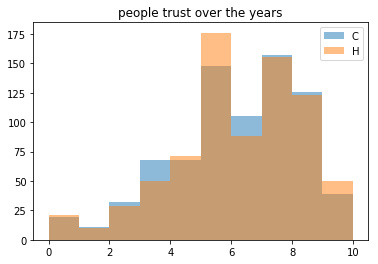

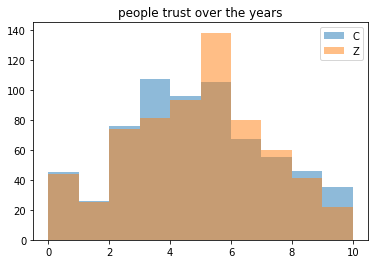

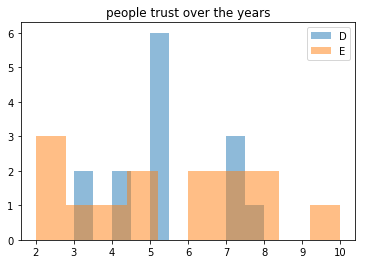

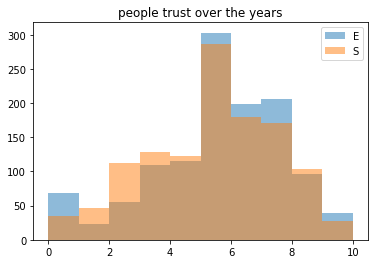

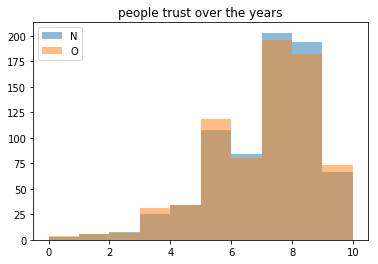

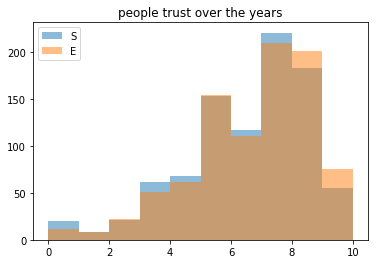

In [22]:
# We can do A/B Test
# people trust and country
for country in dfc:
    
    plt.hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], alpha=.5)
    plt.hist(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)], alpha=.5)
    
    
    plt.title('people trust over the years')
    plt.legend(country)
    
    plt.show()

In [31]:
for country in dfc:
    print('\n', country)
    print('2012 mean: ' + str(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: ' + str(df['ppltrst'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.wilcoxon(df['ppltrst'][(df['cntry'] == country) & (df['year']==6)], 
                          df['ppltrst'][(df['cntry'] == country) & (df['year']==7)]
                         ))


 CH
2012 mean: 5.677878395860285
2014 mean: 5.751617076326003
WilcoxonResult(statistic=106278.5, pvalue=0.4411286510952477)

 CZ
2012 mean: 4.379939209726444
2014 mean: 4.427051671732523
WilcoxonResult(statistic=85832.5, pvalue=0.7452250434946176)

 DE
2012 mean: 5.214285714285714
2014 mean: 5.357142857142857
WilcoxonResult(statistic=44.0, pvalue=0.9157134600899863)

 ES
2012 mean: 5.114591920857379
2014 mean: 4.896949711459192
WilcoxonResult(statistic=243886.5, pvalue=0.007377786388515002)

 NO
2012 mean: 6.648426812585499
2014 mean: 6.59781121751026
WilcoxonResult(statistic=85536.0, pvalue=0.6900902292621642)

 SE
2012 mean: 6.058370044052864
2014 mean: 6.257709251101321
WilcoxonResult(statistic=131329.0, pvalue=0.03679036784404652)


Spain decreased trust. 
<br>
Sweden increased trust.
<br>
P-values indicate that there was a significant change.
<br>
Wilcoxon signed-rank test should be used as we can see that the idstributions are not normal.

**Did people become happier from 2012 to 2014?**

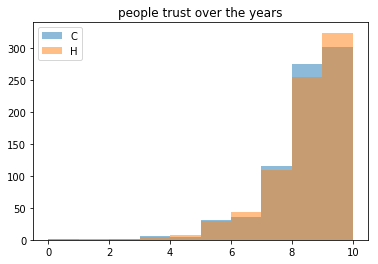

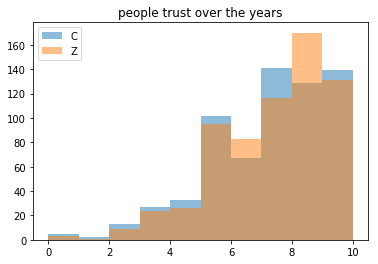

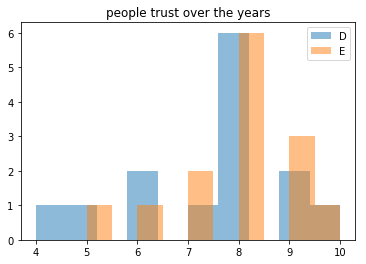

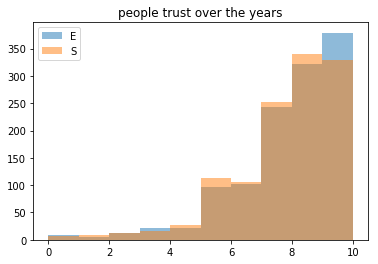

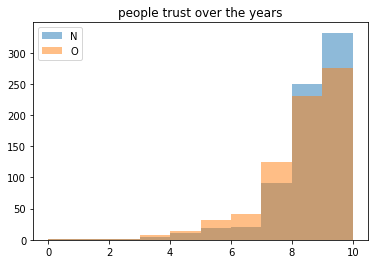

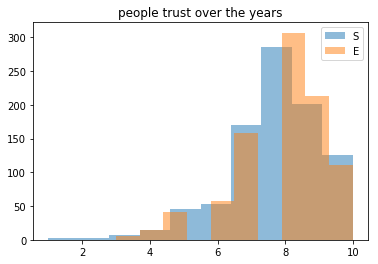

In [24]:
for country in dfc:
    
    plt.hist(df['happy'][(df['cntry'] == country) & (df['year']==6)], alpha=.5)
    plt.hist(df['happy'][(df['cntry'] == country) & (df['year']==7)], alpha=.5)
    
    
    plt.title('people trust over the years')
    plt.legend(country)
    
    plt.show()

In [27]:
for country in dfc:
    print('\n', country)
    print('2012 mean: ' + str(df['happy'][(df['cntry'] == country) & (df['year']==6)].mean()))
    print('2014 mean: ' + str(df['happy'][(df['cntry'] == country) & (df['year']==7)].mean()))  
    print(stats.wilcoxon(df['happy'][(df['cntry'] == country) & (df['year']==6)], 
                          df['happy'][(df['cntry'] == country) & (df['year']==7)]
                         ))


 CH
2012 mean: 8.08796895213454
2014 mean: 8.116429495472186
WilcoxonResult(statistic=93384.0, pvalue=0.9248463130390704)

 CZ
2012 mean: 6.793313069908814
2014 mean: 6.924012158054711
WilcoxonResult(statistic=78000.5, pvalue=0.2829630838149413)

 DE
2012 mean: 7.428571428571429
2014 mean: 7.857142857142857
WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

 ES
2012 mean: 7.549051937345425
2014 mean: 7.4204451772464965
WilcoxonResult(statistic=232720.5, pvalue=0.059772872562481524)

 NO
2012 mean: 8.250341997264021
2014 mean: 7.9151846785225715
WilcoxonResult(statistic=68546.0, pvalue=1.1346429849504098e-05)

 SE
2012 mean: 7.907488986784141
2014 mean: 7.947136563876652
WilcoxonResult(statistic=126465.0, pvalue=0.682451144037987)


Spain's p-value is low.
<br>
Most other countries were happier, except Norway.

**Who reported watching more TV in 2012, men or women?**

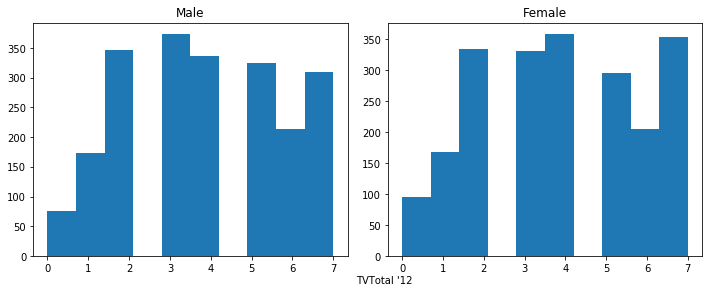

In [48]:
#same method of country and ppltrst, 
#but use gender and tvtot instead.
#male = 1
#female = 2
#Year == 6

 
df_male = df['tvtot'][(df['gndr'] == 1.0) & (df['year'] == 6)]
df_female = df['tvtot'][(df['gndr'] == 2.0) & (df['year'] == 6)]

fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].hist(df_male.dropna())
axs[1].hist(df_female.dropna())

fig.text(0.5, 0, "TVTotal '12")
axs[0].set_title('Male')
axs[1].set_title('Female')
    
plt.tight_layout()
plt.show()

In [57]:
#two different groups
print(stats.mannwhitneyu(df_male, df_female))
#our p-value is high, so we can say there was a change.

MannwhitneyuResult(statistic=2277506.5, pvalue=0.22419270231191457)


In [66]:
print('Male viewers were {} in 2012.'.format(df_male.dropna().count()))
print('Female viewers were {} in 2012.'.format(df_female.dropna().count()))

Male viewers were 2151 in 2012.
Female viewers were 2140 in 2012.


**Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?**

C:\Users\nairj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\nairj\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


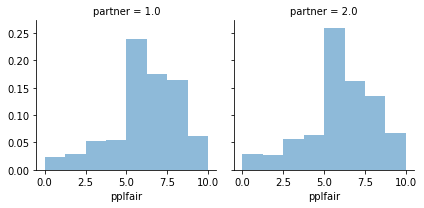

In [60]:
#Partner = 1
#Single = 2

fair = sns.FacetGrid(df,
                     col='partner',
                     dropna=True,
                     sharey=True)

fair = fair.map(plt.hist,
          'pplfair',
          alpha=0.5,
          bins=8,
          normed=True)

In [67]:
print(stats.mannwhitneyu(df_male, df_female))

MannwhitneyuResult(statistic=2277506.5, pvalue=0.22419270231191457)


In [68]:
#since we fail to reject, we can say there was a difference.
df_partner = df['pplfair'][(df['partner'] == 1.0) & (df['year'] == 6)]
df_single = df['pplfair'][(df['partner'] == 2.0) & (df['year'] == 6)]

In [70]:
print('Partners median fairness score was {} in 2012.'.format(df_partner.dropna().median()))
print('Singles  median fairness score was {} in 2012.'.format(df_single.dropna().median()))
#Using median instead of mean because of not normal distributions.

Partners median fairness score was 7.0 in 2012.
Singles  median fairness score was 6.0 in 2012.


**Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?**

In [73]:
three_countries = ['ES','CH','NO']
dfc14 = df[(df.cntry.isin(three_countries)) & (df.year==7)]

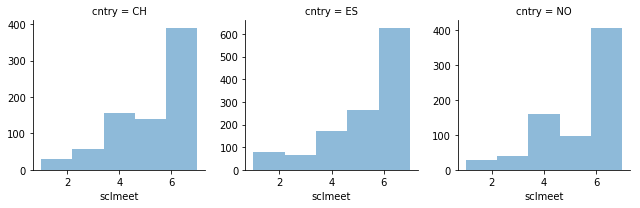

In [74]:
#Facetgrid
#social meet = sclmeet
fg = sns.FacetGrid(dfc14, col='cntry', dropna=True, sharey=False)
fg = fg.map(plt.hist, 'sclmeet', alpha=0.5, bins=5)

plt.show()

In [95]:
#We can use median test or Kruskal,
#which is the non-normal version of ANOVA.
ES = df['sclmeet'][(df['cntry'] == 'ES') & (df['year'] == 7)].dropna()
CH = df['sclmeet'][(df['cntry'] == 'CH') & (df['year'] == 7)].dropna()
NO = df['sclmeet'][(df['cntry'] == 'NO') & (df['year'] == 7)].dropna()

from scipy.stats import kruskal
stat, pval = kruskal(ES,CH,NO)

print('H statistic is:', stat)
print('The pvalue is :', p, '\n')

if pval < 0.05:
    print("Reject NULL hypothesis - Significant differences exist between groups.")
if pval > 0.05:
    print("Accept NULL hypothesis - No significant difference between groups.")

H statistic is: 7.729361944494669
The pvalue is : 0.020969611257989122 

Reject NULL hypothesis - Significant differences exist between groups.
